## **Kelompok Sutet**
Habib Fabian Fahlesi (22/505501/TK/55319)

Muhammad Grandiv Lava Putra (22/493242/TK/54023)

Muhammad Hilmi Dzaki Wismadi (22/497591/TK/54539)

Sean Titan Yang (22/492933/TK/53965)

## **Tujuan**

Memanfaatkan transfer learning untuk membuat model yang dapat memprediksi national demand listrik masa depan kota Panama berdasarkan data lampau time-series dan parameter cuaca. Data diambil per jam sehingga akan dianalisis pola perubahan national demand. Dengan begitu, tren penggunaan listrik masa depan dapat diprediksi, khususnya pada bulan Juni 2020

# Importing Data

'data.csv' digunakan untuk train pre-trained model

In [1]:
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/data.csv",
                 parse_dates=["datetime"],
                 index_col=["datetime"])
train.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43775 entries, 03-01-2015 01:00 to 31-12-2019 23:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  43775 non-null  float64
 1   T2M_toc     43775 non-null  float64
 2   QV2M_toc    43775 non-null  float64
 3   TQL_toc     43775 non-null  float64
 4   W2M_toc     43775 non-null  float64
 5   T2M_san     43775 non-null  float64
 6   QV2M_san    43775 non-null  float64
 7   TQL_san     43775 non-null  float64
 8   W2M_san     43775 non-null  float64
 9   T2M_dav     43775 non-null  float64
 10  QV2M_dav    43775 non-null  float64
 11  TQL_dav     43775 non-null  float64
 12  W2M_dav     43775 non-null  float64
 13  Holiday_ID  43775 non-null  int64  
 14  holiday     43775 non-null  int64  
 15  school      43775 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 5.7+ MB


In [3]:
train.isna().sum()

nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [4]:
actual_predict = pd.read_csv("https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/Predict_Jan.csv",
                 parse_dates=["datetime"],
                 index_col=["datetime"])
actual_predict.head()

,nat_demand
datetime,
01-01-2020 00:00,1032.2630
01-01-2020 01:00,1017.5806
01-01-2020 02:00,1000.2797
01-01-2020 03:00,987.2383
01-01-2020 04:00,970.3667


In [5]:
actual_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 01-01-2020 00:00 to 31-01-2020 23:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  744 non-null    float64
dtypes: float64(1)
memory usage: 11.6+ KB


'Test_Jan.csv' dan 'Predict_Jan.csv' digunakan untuk validasi pre-trained model

In [6]:
test = pd.read_csv("https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/Test_Jan.csv",
                   parse_dates=["datetime"],
                   index_col=["datetime"])

test = pd.merge(test, actual_predict, on='datetime', how='inner')
test['nat_demand'] = test['nat_demand_y']
test = test.drop(['nat_demand_x', 'nat_demand_y'], axis=1)
test = test[train.columns]
test.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
01-01-2020 00:00,1032.2630,25.809259,0.018042,0.032806,14.849625,23.301447,0.017035,0.021866,4.559083,22.598322,0.016195,0.068054,3.737708,1,1,0
01-01-2020 01:00,1017.5806,25.650842,0.018065,0.053177,15.933757,23.041467,0.016936,0.023796,4.846412,22.471155,0.016104,0.080109,3.591759,1,1,0
01-01-2020 02:00,1000.2797,25.501489,0.018119,0.069000,16.806818,22.806177,0.016822,0.024910,5.204608,22.368677,0.016013,0.094757,3.704177,1,1,0
01-01-2020 03:00,987.2383,25.430994,0.018142,0.080017,17.460632,22.657556,0.016746,0.025208,5.628076,22.282556,0.015937,0.107086,3.936592,1,1,0
01-01-2020 04:00,970.3667,25.360132,0.018204,0.084137,16.632112,22.539819,0.016647,0.022789,5.729821,22.203882,0.015862,0.113800,4.088643,1,1,0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 01-01-2020 00:00 to 31-01-2020 23:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  744 non-null    float64
 1   T2M_toc     744 non-null    float64
 2   QV2M_toc    744 non-null    float64
 3   TQL_toc     744 non-null    float64
 4   W2M_toc     744 non-null    float64
 5   T2M_san     744 non-null    float64
 6   QV2M_san    744 non-null    float64
 7   TQL_san     744 non-null    float64
 8   W2M_san     744 non-null    float64
 9   T2M_dav     744 non-null    float64
 10  QV2M_dav    744 non-null    float64
 11  TQL_dav     744 non-null    float64
 12  W2M_dav     744 non-null    float64
 13  Holiday_ID  744 non-null    int64  
 14  holiday     744 non-null    int64  
 15  school      744 non-null    int64  
dtypes: float64(13), int64(3)
memory usage: 98.8+ KB


# Visualization

In [8]:
import requests
import csv
from datetime import datetime

# URL of the CSV file
url = "https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/data.csv"

# Fetch the content of the URL
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

timesteps_train = []
nat_demand_train = []

# Decode the content and process it as CSV
lines = response.content.decode('utf-8').splitlines()
csv_reader = csv.reader(lines, delimiter=",")
next(csv_reader)  # Skip the header

for line in csv_reader:
    timesteps_train.append(datetime.strptime(line[0], "%d-%m-%Y %H:%M"))
    nat_demand_train.append(float(line[1]))

# View first 10 of each
print(timesteps_train[:10], nat_demand_train[:10])


[datetime.datetime(2015, 1, 3, 1, 0), datetime.datetime(2015, 1, 3, 2, 0), datetime.datetime(2015, 1, 3, 3, 0), datetime.datetime(2015, 1, 3, 4, 0), datetime.datetime(2015, 1, 3, 5, 0), datetime.datetime(2015, 1, 3, 6, 0), datetime.datetime(2015, 1, 3, 7, 0), datetime.datetime(2015, 1, 3, 8, 0), datetime.datetime(2015, 1, 3, 9, 0), datetime.datetime(2015, 1, 3, 10, 0)] [970.345, 912.1755, 900.2688, 889.9538, 893.6865, 879.2323, 932.4876, 1048.972, 1167.9074, 1257.5069]


In [9]:
import requests
import csv
from datetime import datetime

# URL of the CSV file
url = "https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/Predict_Jan.csv"

# Fetch the content of the URL
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

timesteps_test = []
nat_demand_test = []

# Decode the content and process it as CSV
lines = response.content.decode('utf-8').splitlines()
csv_reader = csv.reader(lines, delimiter=",")
next(csv_reader)  # Skip the header

for line in csv_reader:
    timesteps_test.append(datetime.strptime(line[0], "%d-%m-%Y %H:%M"))
    nat_demand_test.append(float(line[1]))

# View first 10 of each
print(timesteps_test[:10], nat_demand_test[:10])


[datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2020, 1, 1, 1, 0), datetime.datetime(2020, 1, 1, 2, 0), datetime.datetime(2020, 1, 1, 3, 0), datetime.datetime(2020, 1, 1, 4, 0), datetime.datetime(2020, 1, 1, 5, 0), datetime.datetime(2020, 1, 1, 6, 0), datetime.datetime(2020, 1, 1, 7, 0), datetime.datetime(2020, 1, 1, 8, 0), datetime.datetime(2020, 1, 1, 9, 0)] [1032.263, 1017.5806, 1000.2797, 987.2383, 970.3667, 957.6767, 922.3729, 924.4692, 954.3947, 986.0648]


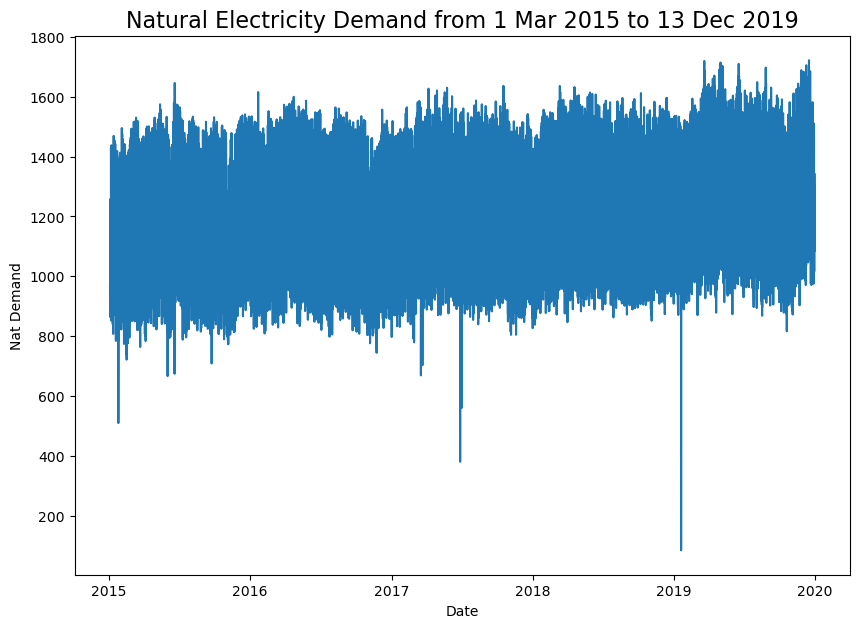

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timesteps_train, nat_demand_train)
plt.title("Natural Electricity Demand from 1 Mar 2015 to 13 Dec 2019", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Nat Demand");

In [11]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Nat Demand")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [12]:
train.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000
mean,1184.102195,27.381070,0.018372,0.082358,13.018476,26.869752,0.017909,0.109571,6.934124,24.678938,0.016912,0.148480,3.562928,0.730828,0.062501,0.739600
std,193.512875,1.652179,0.001587,0.065835,7.151448,2.960669,0.001853,0.086249,4.055238,2.374089,0.001566,0.088259,1.709116,3.244740,0.242067,0.438858
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010385,0.000009,0.060431,19.933740,0.009655,0.000051,0.015497,0.000000,0.000000,0.000000
25%,1017.453350,26.168436,0.017337,0.028423,7.387169,24.767938,0.016707,0.040314,3.912895,22.951654,0.015867,0.079285,2.301747,0.000000,0.000000,0.000000
50%,1173.251500,27.109338,0.018670,0.068237,11.767408,26.141260,0.018418,0.089752,5.888003,23.981989,0.017224,0.134277,3.408653,0.000000,0.000000,1.000000
75%,1332.279950,28.521463,0.019549,0.120148,18.038599,28.642450,0.019265,0.161377,9.151058,26.174570,0.018092,0.204773,4.652970,0.000000,0.000000,1.000000
max,1721.515700,35.039575,0.022690,0.521240,39.229726,39.063440,0.022011,0.484985,24.483937,34.216211,0.020958,0.477783,10.288902,22.000000,1.000000,1.000000


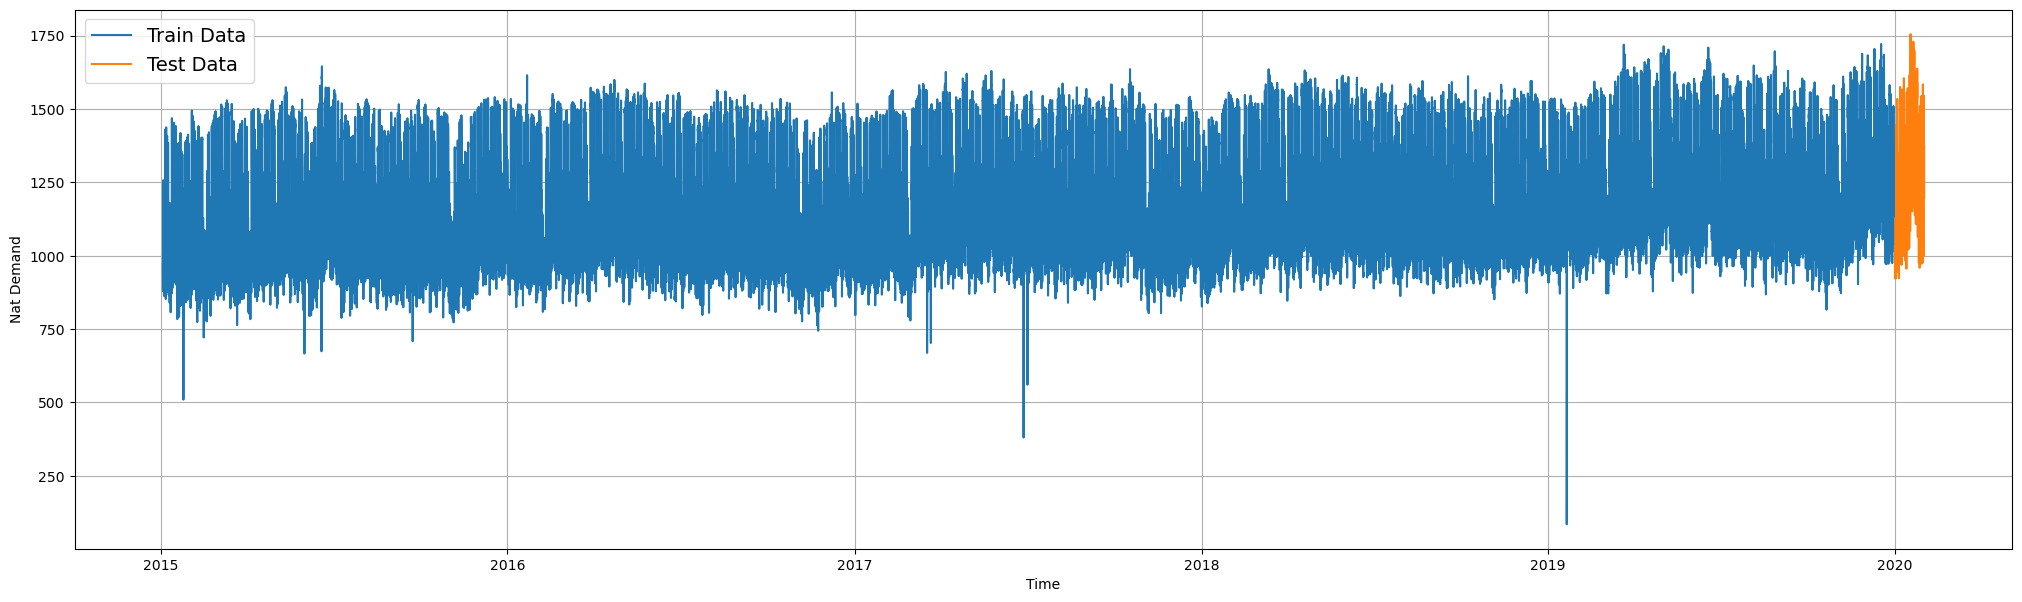

In [13]:
plt.figure(figsize=(25, 7))
plot_time_series(timesteps=timesteps_train, values=nat_demand_train, format='-', label="Train Data")
plot_time_series(timesteps=timesteps_test, values=nat_demand_test, format='-', label="Test Data")

In [14]:
train.columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

# Preprocessing

Kolom 'Holiday_ID', 'holiday', dan 'school' akan didrop

In [15]:
col=['Holiday_ID','holiday', 'school']
train= train.drop(columns=col)
test= test.drop(columns=col)

Mendefinisikan features apa saja yang akan digunakan untuk prediksi dan target (output prediksi)

In [16]:
features = ['T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav', 'W2M_dav']
target = 'nat_demand'

**Lag Features**

Lag featuring digunakan untuk menangkap pola temporal dan dependensi waktu dalam data

In [17]:
for i in range(1, 8):
    train[f'{target}_lag_{i}'] = train[target].shift(i)
    test[f'{target}_lag_{i}'] = test[target].shift(i)

test.dropna(inplace=True)
train.dropna(inplace=True)

In [18]:
train.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,nat_demand_lag_1,nat_demand_lag_2,nat_demand_lag_3,nat_demand_lag_4,nat_demand_lag_5,nat_demand_lag_6,nat_demand_lag_7
datetime,,,,,,,,,,,,,,,,,,,,
03-01-2015 08:00,1048.9720,27.674066,0.019370,0.006863,23.775317,26.189691,0.018073,0.004539,12.872866,24.088129,0.016677,0.056198,5.060611,932.4876,879.2323,893.6865,889.9538,900.2688,912.1755,970.3450
03-01-2015 09:00,1167.9074,28.760400,0.019171,0.010231,24.636152,27.916650,0.018454,0.004292,14.548027,25.479150,0.016646,0.051071,4.915658,1048.9720,932.4876,879.2323,893.6865,889.9538,900.2688,912.1755
03-01-2015 10:00,1257.5069,29.766656,0.018759,0.009018,25.862671,29.172906,0.018675,0.004921,15.081688,26.704156,0.016608,0.058685,4.685580,1167.9074,1048.9720,932.4876,879.2323,893.6865,889.9538,900.2688
03-01-2015 11:00,1254.5830,30.523767,0.018408,0.004322,26.828082,30.070642,0.018820,0.007439,15.287239,27.648767,0.016737,0.077240,4.069102,1257.5069,1167.9074,1048.9720,932.4876,879.2323,893.6865,889.9538
03-01-2015 12:00,1216.9004,30.981805,0.018134,0.002798,26.654310,30.638055,0.018843,0.009872,15.280927,28.138055,0.017264,0.095459,3.122228,1254.5830,1257.5069,1167.9074,1048.9720,932.4876,879.2323,893.6865


In [19]:
train

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,nat_demand_lag_1,nat_demand_lag_2,nat_demand_lag_3,nat_demand_lag_4,nat_demand_lag_5,nat_demand_lag_6,nat_demand_lag_7
datetime,,,,,,,,,,,,,,,,,,,,
03-01-2015 08:00,1048.9720,27.674066,0.019370,0.006863,23.775317,26.189691,0.018073,0.004539,12.872866,24.088129,0.016677,0.056198,5.060611,932.4876,879.2323,893.6865,889.9538,900.2688,912.1755,970.3450
03-01-2015 09:00,1167.9074,28.760400,0.019171,0.010231,24.636152,27.916650,0.018454,0.004292,14.548027,25.479150,0.016646,0.051071,4.915658,1048.9720,932.4876,879.2323,893.6865,889.9538,900.2688,912.1755
03-01-2015 10:00,1257.5069,29.766656,0.018759,0.009018,25.862671,29.172906,0.018675,0.004921,15.081688,26.704156,0.016608,0.058685,4.685580,1167.9074,1048.9720,932.4876,879.2323,893.6865,889.9538,900.2688
03-01-2015 11:00,1254.5830,30.523767,0.018408,0.004322,26.828082,30.070642,0.018820,0.007439,15.287239,27.648767,0.016737,0.077240,4.069102,1257.5069,1167.9074,1048.9720,932.4876,879.2323,893.6865,889.9538
03-01-2015 12:00,1216.9004,30.981805,0.018134,0.002798,26.654310,30.638055,0.018843,0.009872,15.280927,28.138055,0.017264,0.095459,3.122228,1254.5830,1257.5069,1167.9074,1048.9720,932.4876,879.2323,893.6865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-12-2019 19:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,0.016697,0.073425,3.865351,1287.3592,1193.3218,1223.4536,1250.3840,1272.5977,1264.0997,1292.4334
31-12-2019 20:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,0.016606,0.064362,4.171572,1301.6065,1287.3592,1193.3218,1223.4536,1250.3840,1272.5977,1264.0997
31-12-2019 21:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,0.016492,0.054260,4.045283,1250.9634,1301.6065,1287.3592,1193.3218,1223.4536,1250.3840,1272.5977


**Scale the Data**

Melakukan scaling terhadap data untuk menormalisasi untuk memastikan semua fitur berada pada skala yang sama. Model SimpleRNN juga akan bekerja lebih baik dengan normalisasi.

Kolom-kolom yang akan discaling adalah semua kecuali 'nat_demand' dan memilih scaler 'MinMaxScaler()' untuk menskalakan data ke rentang [0, 1]

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'train' and 'test' are your dataframes and 'nat_demand' is a column to exclude from scaling
columns_to_scale = [col for col in train.columns if col != 'nat_demand']

# Create a scaler and fit it only on the columns to be scaled
scaler = MinMaxScaler()
scaler.fit(train[columns_to_scale])

# Transform the selected columns in both the train and test sets
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])

test_scaled = test.copy()
test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])

Melakukan windowing untuk mengubah data time series menjadi bentuk yang cocok untuk dimasukkan ke dalam model dengan menggunakan sliding window

In [21]:
def prepare_data_with_window(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

'n_steps_in' adalah 48 dan 'n_steps_out' adalah 1, artinya panjang urutan input (ukuran window) adalah 48 jam dan prediksinya adalah 1 jam ke depan

In [22]:
# Define window size and forecast horizon
n_steps_in = 48  # Window size
n_steps_out = 1  # Forecast horizon

# Prepare data for LSTM
X_train, y_train = prepare_data_with_window(train_scaled.values, n_steps_in, n_steps_out)
X_test, y_test = prepare_data_with_window(test_scaled.values, n_steps_in, n_steps_out)

Reshape untuk menyesuaikan bentuk data agar cocok dengan format input yang diharapkan oleh model RNN (samples, timesteps, dan features)

In [23]:
# Reshape input for SimpleRNN [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [24]:
X_train.shape

(43720, 48, 20)

In [25]:
X_test.shape

(689, 48, 20)

# Pre-trained Model



Metric yang digunakan untuk mengevaluasi performa model adalah Root Mean Squared Error (RMSE)

c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 75s 146ms/step - loss: 93912.0000 - val_loss: 4032.7009
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 51s 147ms/step - loss: 10587.0830 - val_loss: 2363.7349
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 100s 293ms/step - loss: 7028.9219 - val_loss: 1986.9668
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 58s 169ms/step - loss: 5616.8359 - val_loss: 1564.8173
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 79s 156ms/step - loss: 4978.8999 - val_loss: 1467.6024
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 102s 216ms/step - loss: 4553.5693 - val_loss: 1426.1906
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - loss: 4365.9219 - val_loss: 1396.1116
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - loss: 4190.4795 - val_loss: 1154.1997
Epoch 9/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - loss: 4076.3767 - val_loss: 1157.8275
Epoch 10/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - loss: 3963.4199 - val_loss: 1357.2579
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step
Root Mean

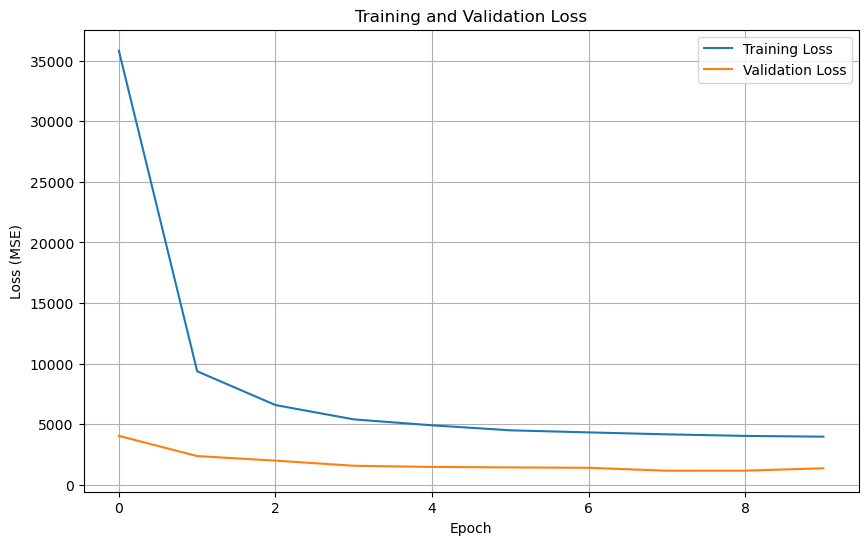

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 48, 64)         │         5,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,973 (453.02 KB)

 Trainable params: 38,657 (151.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,316 (302.02 KB)

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, AdamW
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras.callback import EarlyStopping

tf.random.set_seed(42)

# Build SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', return_sequences=True, input_shape=(n_steps_in, X_train.shape[2])))
model.add(SimpleRNN(units=64, activation='relu'))
model.add(Dense(units=128))
model.add(Dropout(0.2))
model.add(Dense(units=128))
model.add(Dense(n_steps_out))
optimaz= AdamW(0.0001)
model.compile(optimizer=optimaz, loss='mse')

# Define early_stopping
# early_stopping = EarlyStopping(monitor='loss', mode='max', patience=50, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE for the entire horizon
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) for Horizon {n_steps_out}: {rmse}')

# Plot training history
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Plot the training and validation loss
plot_loss(history)

# Display model summary
model.summary()

Dari grafik di atas, terlihat bahwa tidak terjadi overfitting karena loss (MSE) konvergen setelah beberapa epoch

Berikut merupakan implementasi K-Fold Cross Validation untuk mendapatkan evaluasi model yang lebih robust. Data dibagi menjadi 5 fold tanpa dilakukan shuffle karena data time-series memerlukan urutas kronologis yang tetap. Rata-rata RMSE dihitung untuk memberikan gambaran umum mengenai performa model. 

c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training fold 1
Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 49s 91ms/step - loss: 272961.5625 - val_loss: 7222.5303
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 17711.2930 - val_loss: 2954.9512
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - loss: 10722.5381 - val_loss: 1955.7626
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - loss: 8340.1475 - val_loss: 1583.0680
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - loss: 6734.0630 - val_loss: 1387.6371
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 5726.3579 - val_loss: 1274.4637
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - loss: 5023.2773 - val_loss: 1261.2595
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - loss: 4752.7007 - val_loss: 1137.2045
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 4450.4185 - val_loss: 1059.7637
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 4266.6553 - val_loss: 1127.1083


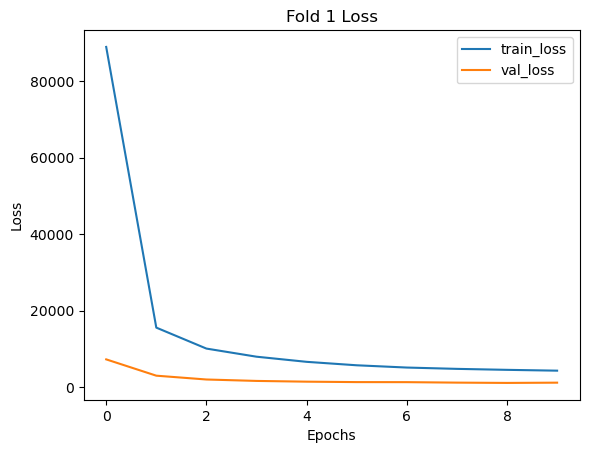

RMSE for fold 1: 33.57242782636147
Training fold 2
Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 34s 77ms/step - loss: 506440.1250 - val_loss: 10287.8223
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - loss: 19398.6836 - val_loss: 3681.6958
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 10963.9424 - val_loss: 1798.7271
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 8008.4624 - val_loss: 1530.6010
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 6441.0952 - val_loss: 1056.7483
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 5626.8438 - val_loss: 892.4136
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - loss: 5048.4336 - val_loss: 862.2686
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - loss: 4681.1357 - val_loss: 845.4479
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - loss: 4420.6763 - val_loss: 803.9263
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - loss: 4309.5059 - val_loss: 870.2737


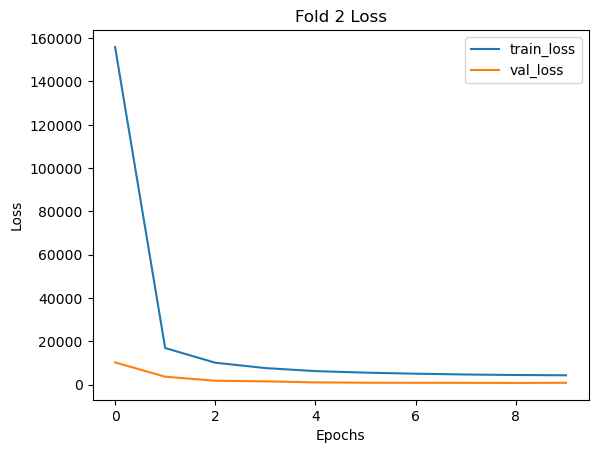

RMSE for fold 2: 29.500399312048515
Training fold 3
Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - loss: 234019.6719 - val_loss: 5892.7310
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 15829.2432 - val_loss: 3572.6128
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - loss: 10945.2383 - val_loss: 2805.0352
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - loss: 8675.9033 - val_loss: 2475.5439
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - loss: 7351.9365 - val_loss: 2340.3362
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 6469.9390 - val_loss: 2126.3633
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - loss: 5928.7021 - val_loss: 2141.2815
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 5533.6768 - val_loss: 1942.2795
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 5122.4810 - val_loss: 1843.6532
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - loss: 4932.6831 - val_loss: 1814.2374


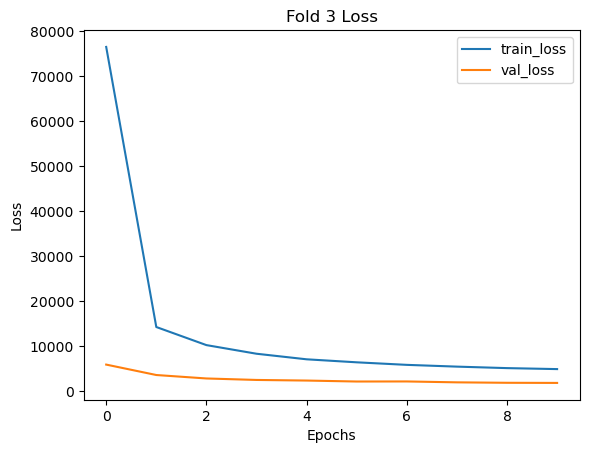

RMSE for fold 3: 42.59387036850197
Training fold 4
Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - loss: 212273.3438 - val_loss: 10727.1201
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - loss: 15794.2227 - val_loss: 2441.1873
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 8454.8721 - val_loss: 1950.8417
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 6865.8335 - val_loss: 1689.9357
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 6017.1562 - val_loss: 1533.0581
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 5260.6206 - val_loss: 1191.6146
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 4852.4697 - val_loss: 1155.6326
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - loss: 4569.3721 - val_loss: 1136.1508
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 4424.0854 - val_loss: 1076.5295
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - loss: 4322.9893 - val_loss: 1062.9355


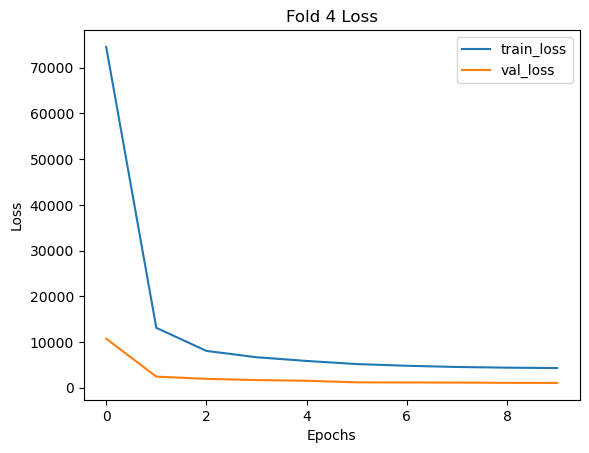

RMSE for fold 4: 32.602692325558024
Training fold 5
Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 40788.2578 - val_loss: 3143.9656
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 8420.0713 - val_loss: 2071.4514
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 5810.9980 - val_loss: 1695.9281
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 4880.9868 - val_loss: 1402.5404
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - loss: 4461.4385 - val_loss: 1504.8816
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - loss: 4224.0835 - val_loss: 1239.2627
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - loss: 4053.5425 - val_loss: 1317.9781
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 4137.8872 - val_loss: 1376.7389
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 3975.1807 - val_loss: 1337.1458
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 3935.4500 - val_loss: 1577.4606


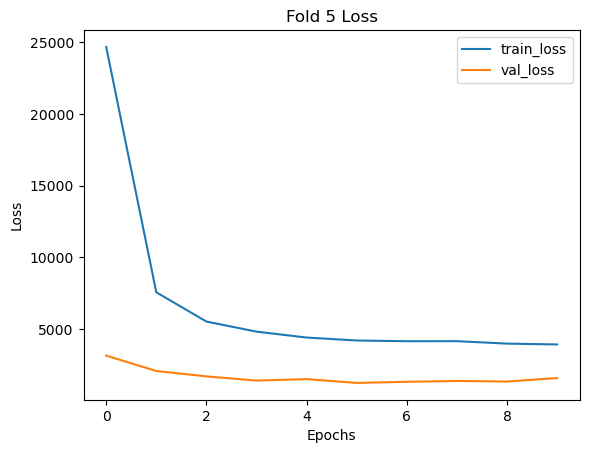

RMSE for fold 5: 39.717257852085694
Average RMSE across all folds: 35.59732953691114
RMSE values for pre-trained model: [33.57242782636147, 29.500399312048515, 42.59387036850197, 32.602692325558024, 39.717257852085694]


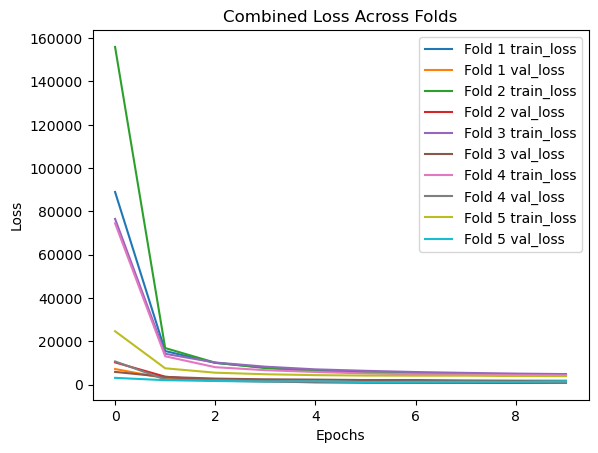

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, AdamW
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold

# Assuming prepare_data_with_window and other preprocessing steps are defined elsewhere
# Prepare the data for K-Fold Cross Validation
X, y = prepare_data_with_window(train_scaled.values, n_steps_in, n_steps_out)

# Reshape input for SimpleRNN [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=False)  # Time series data should not be shuffled

# Initialize variables to store cumulative results
cumulative_rmse = 0
fold_no = 1
rmse_pretrained = []
fold_histories = []

for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Set random seed for reproducibility
    tf.random.set_seed(42)

    # Build SimpleRNN model
    model = Sequential()
    model.add(SimpleRNN(units=64, activation='relu', return_sequences=True, input_shape=(n_steps_in, X_train.shape[2])))
    model.add(SimpleRNN(units=64, activation='relu'))
    model.add(Dense(units=128))
    model.add(Dropout(0.2))
    model.add(Dense(units=128))
    model.add(Dense(n_steps_out))

    optimaz = AdamW(0.0001)
    model.compile(optimizer=optimaz, loss='mse')

    # Train the model
    print(f'Training fold {fold_no}')
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_val, y_val))

    fold_histories.append(history)

    # Plot the training history
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'Fold {fold_no} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate the model on the validation set
    val_loss = model.evaluate(X_val, y_val, verbose=0)
    rmse = np.sqrt(val_loss)
    rmse_pretrained.append(rmse)
    print(f'RMSE for fold {fold_no}: {rmse}')

    # Add RMSE to the cumulative RMSE
    cumulative_rmse += rmse

    fold_no += 1

# Calculate average RMSE across all folds
average_rmse = cumulative_rmse / kf.get_n_splits()
print(f'Average RMSE across all folds: {average_rmse}')
print(f'RMSE values for pre-trained model: {rmse_pretrained}')

# Plot combined loss across all folds
plt.figure()
for fold, history in enumerate(fold_histories, 1):
    plt.plot(history.history['loss'], label=f'Fold {fold} train_loss')
    plt.plot(history.history['val_loss'], label=f'Fold {fold} val_loss')

plt.title('Combined Loss Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Berdasarkan 'Combined Loss Across Folds' di atas, terlihat bahwa semua loss konvergen dan tidak terjadi overfitting. Selain itu, setelah dilakukan cross validation dengan metode K-Fold sebanyak 5, rata-rata RMSE adalah 35.59.

Memastikan jumlah prediksi yang dibuat oleh model akan sama dengan data uji yang tersedia

In [28]:
len(y_pred), len(y_test)

(689, 689)

# Evaluate

Mengevaluasi model untuk mengukur performa generalisasi model terhadap data baru

In [29]:
model.evaluate(X_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1528.7550


1627.1422119140625

Berikut merupakan normalisasi kesalahan dengan membandingkan kesalahan model terhadap kesalahan naive forecast (performa baseline)

In [30]:
import tensorflow as tf
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

Berikut perhitungan berbagai metrik error untuk mengevaluasi performa prediksi dengan membandingkan nilai aktual ('y_true') dengan nilai prediksi ('y_pred')

In [31]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.MeanAbsoluteError()(y_true, y_pred)
    mse = tf.keras.metrics.MeanSquaredError()(y_true, y_pred) # puts an emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

results = evaluate_preds(y_true=y_test.flatten(), y_pred=y_pred.flatten())
print(results)

{'mae': 28.27348, 'mse': 1357.257, 'rmse': 36.84097, 'mape': 2.1870172, 'mase': 0.6022719}


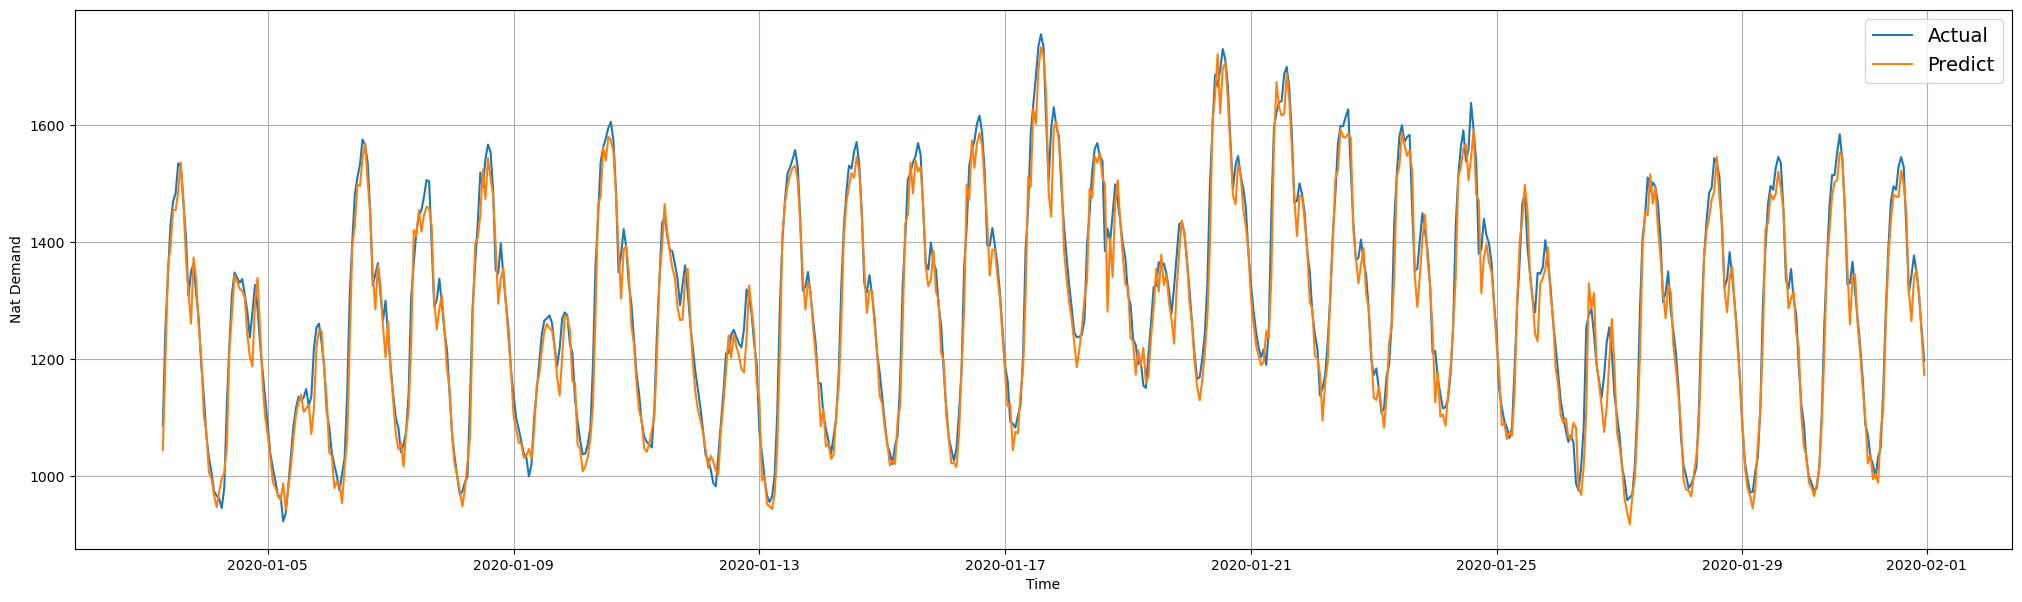

In [32]:
plt.figure(figsize=(25, 7))
plot_time_series(timesteps=timesteps_test[-len(X_test):], values=y_test.flatten(), format='-', label="Actual")
plot_time_series(timesteps=timesteps_test[-len(X_test):], values=y_pred.flatten(), format='-', label="Predict")

Berdasarkan grafik di atas, terlihat bahwa hasil prediksi yang dihasilkan model cukup baik yang mendekati nilai actual

**Mengekspor model pre-trained untuk dilakukan transfer learning terhadap data baru**

In [33]:
model.save('modelsutet.keras')

In [34]:
from tensorflow.keras.models import load_model
modelbaru = load_model('modelsutet.keras')

In [35]:
modelbaru.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 48, 64)         │         5,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,973 (453.02 KB)

 Trainable params: 38,657 (151.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,316 (302.02 KB)

Di atas merupakan model pre-trained yang akan dilakukan training dan tuning kembali untuk dapat dilakukan transfer learning

**Data Cleaning Dataset Baru terhadap Pre-Trained Model**

Dataset yang digunakan untuk melakukan training model pre-trained berikut adalah data bulan Februari hingga April 2020

In [36]:
import pandas as pd
trainbaru = pd.read_csv("https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/datasetFebApr2020.csv",
                 parse_dates=["datetime"],
                 index_col=["datetime"])
trainbaru.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
01-02-2020 00:00,1143.2227,25.708795,0.017822,0.018356,16.659200,23.169733,0.016464,0.032333,5.850764,21.372858,0.015122,0.025642,3.979504,0,0,0
01-02-2020 01:00,1110.1528,25.578577,0.017731,0.016441,16.197990,23.023889,0.016472,0.024857,5.390095,21.203577,0.015008,0.038834,3.939244,0,0,0
01-02-2020 02:00,1049.0349,25.420892,0.017755,0.013824,15.199255,22.881830,0.016496,0.017738,5.026976,21.038080,0.014890,0.042099,3.979422,0,0,0
01-02-2020 03:00,1030.6316,25.276697,0.017762,0.014671,14.310152,22.675134,0.016511,0.013027,4.737385,20.901697,0.014748,0.042267,3.950791,0,0,0
01-02-2020 04:00,1023.7209,25.203577,0.017738,0.013577,13.191527,22.492639,0.016487,0.014145,4.542847,20.789514,0.014606,0.042267,3.764820,0,0,0


In [37]:
trainbaru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 01-02-2020 00:00 to 30-04-2020 23:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  2160 non-null   float64
 1   T2M_toc     2160 non-null   float64
 2   QV2M_toc    2160 non-null   float64
 3   TQL_toc     2160 non-null   float64
 4   W2M_toc     2160 non-null   float64
 5   T2M_san     2160 non-null   float64
 6   QV2M_san    2160 non-null   float64
 7   TQL_san     2160 non-null   float64
 8   W2M_san     2160 non-null   float64
 9   T2M_dav     2160 non-null   float64
 10  QV2M_dav    2160 non-null   float64
 11  TQL_dav     2160 non-null   float64
 12  W2M_dav     2160 non-null   float64
 13  Holiday_ID  2160 non-null   int64  
 14  holiday     2160 non-null   int64  
 15  school      2160 non-null   int64  
dtypes: float64(13), int64(3)
memory usage: 286.9+ KB


In [38]:
trainbaru.isna().sum()

nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

Berikut adalah dataset bulan Mei 2020 yang akan digunakan untuk memvalidasi performa model

In [39]:
testbaru = pd.read_csv("https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/datasetMei2020.csv",
                   parse_dates=["datetime"],
                   index_col=["datetime"])
testbaru.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
01-05-2020 00:00,1102.9328,26.874017,0.018437,0.036209,17.919882,25.061517,0.017797,0.055649,4.158032,23.311517,0.017140,0.055389,1.802112,12,1,1
01-05-2020 01:00,1078.1345,26.768365,0.018583,0.050919,16.628721,24.799615,0.017766,0.064728,3.771603,23.143365,0.016942,0.053055,1.860856,12,1,1
01-05-2020 02:00,1028.1121,26.687830,0.018697,0.062714,15.906288,24.640955,0.017767,0.070129,3.455991,23.023767,0.016790,0.061813,1.870863,12,1,1
01-05-2020 03:00,1000.8457,26.642664,0.018735,0.058975,15.762716,24.572351,0.017812,0.067871,3.261924,22.955164,0.016652,0.076141,1.863408,12,1,1
01-05-2020 04:00,970.6304,26.604272,0.018796,0.043167,15.394947,24.518335,0.017873,0.068268,3.118907,22.885522,0.016538,0.093811,1.742467,12,1,1


In [40]:
testbaru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 01-05-2020 00:00 to 31-05-2020 23:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  744 non-null    float64
 1   T2M_toc     744 non-null    float64
 2   QV2M_toc    744 non-null    float64
 3   TQL_toc     744 non-null    float64
 4   W2M_toc     744 non-null    float64
 5   T2M_san     744 non-null    float64
 6   QV2M_san    744 non-null    float64
 7   TQL_san     744 non-null    float64
 8   W2M_san     744 non-null    float64
 9   T2M_dav     744 non-null    float64
 10  QV2M_dav    744 non-null    float64
 11  TQL_dav     744 non-null    float64
 12  W2M_dav     744 non-null    float64
 13  Holiday_ID  744 non-null    int64  
 14  holiday     744 non-null    int64  
 15  school      744 non-null    int64  
dtypes: float64(13), int64(3)
memory usage: 98.8+ KB


## **Visualization**

In [41]:
import requests
import csv
from datetime import datetime

# URL of the CSV file
url = "https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/datasetFebApr2020.csv"

# Fetch the content of the URL
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

timesteps_train = []
nat_demand_train = []

# Decode the content and process it as CSV
lines = response.content.decode('utf-8').splitlines()
csv_reader = csv.reader(lines, delimiter=",")
next(csv_reader)  # Skip the header

for line in csv_reader:
    timesteps_train.append(datetime.strptime(line[0], "%d-%m-%Y %H:%M"))
    nat_demand_train.append(float(line[1]))

# View first 10 of each
print(timesteps_train[:10], nat_demand_train[:10])


[datetime.datetime(2020, 2, 1, 0, 0), datetime.datetime(2020, 2, 1, 1, 0), datetime.datetime(2020, 2, 1, 2, 0), datetime.datetime(2020, 2, 1, 3, 0), datetime.datetime(2020, 2, 1, 4, 0), datetime.datetime(2020, 2, 1, 5, 0), datetime.datetime(2020, 2, 1, 6, 0), datetime.datetime(2020, 2, 1, 7, 0), datetime.datetime(2020, 2, 1, 8, 0), datetime.datetime(2020, 2, 1, 9, 0)] [1143.2227, 1110.1528, 1049.0349, 1030.6316, 1023.7209, 1030.6722, 1023.649, 1065.8115, 1171.4743999999998, 1267.0011]


In [42]:
import requests
import csv
from datetime import datetime

# URL of the CSV file
url = "https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/datasetMei2020.csv"

# Fetch the content of the URL
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

timesteps_test = []
nat_demand_test = []

# Decode the content and process it as CSV
lines = response.content.decode('utf-8').splitlines()
csv_reader = csv.reader(lines, delimiter=",")
next(csv_reader)  # Skip the header

for line in csv_reader:
    timesteps_test.append(datetime.strptime(line[0], "%d-%m-%Y %H:%M"))
    nat_demand_test.append(float(line[1]))

# View first 10 of each
print(timesteps_test[:10], nat_demand_test[:10])


[datetime.datetime(2020, 5, 1, 0, 0), datetime.datetime(2020, 5, 1, 1, 0), datetime.datetime(2020, 5, 1, 2, 0), datetime.datetime(2020, 5, 1, 3, 0), datetime.datetime(2020, 5, 1, 4, 0), datetime.datetime(2020, 5, 1, 5, 0), datetime.datetime(2020, 5, 1, 6, 0), datetime.datetime(2020, 5, 1, 7, 0), datetime.datetime(2020, 5, 1, 8, 0), datetime.datetime(2020, 5, 1, 9, 0)] [1102.9328, 1078.1345, 1028.1121, 1000.8457, 970.6304, 954.8015, 896.3394999999999, 914.143, 979.6018, 1002.0474]


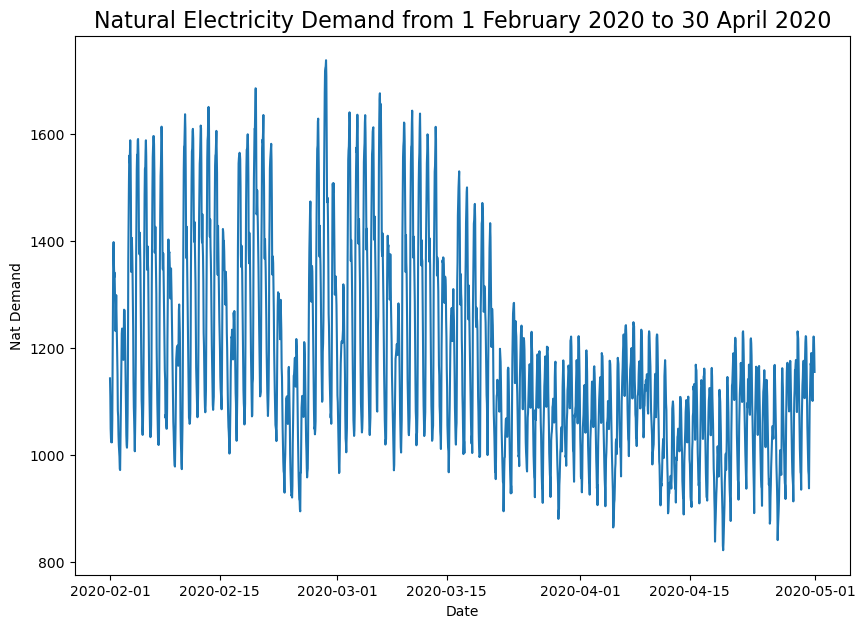

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timesteps_train, nat_demand_train)
plt.title("Natural Electricity Demand from 1 February 2020 to 30 April 2020", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Nat Demand");

In [44]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Nat Demand")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [45]:
trainbaru.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,1179.511310,27.572175,0.016607,0.032892,20.998069,28.132552,0.015770,0.041687,10.010854,25.530096,0.015354,0.071859,3.883973,0.700000,0.100000,0.666667
std,183.749390,2.142063,0.001305,0.037068,5.637009,4.171171,0.001781,0.061898,4.314470,3.255272,0.001431,0.057620,1.909511,2.253668,0.300069,0.471514
min,821.847600,23.297876,0.013034,0.000026,2.227949,21.399316,0.010247,0.000020,0.060394,20.339197,0.010452,0.000032,0.097128,0.000000,0.000000,0.000000
25%,1048.408575,25.750085,0.015509,0.009127,17.563693,24.629099,0.014647,0.005507,6.587261,22.827104,0.014466,0.032227,2.352923,0.000000,0.000000,0.000000
50%,1137.175550,26.944650,0.016725,0.021198,21.707192,26.870370,0.015896,0.020103,10.104209,24.381448,0.015398,0.056389,3.893498,0.000000,0.000000,1.000000
75%,1283.546900,29.569116,0.017663,0.042622,24.857620,31.888132,0.016872,0.047222,13.089893,28.382448,0.016303,0.095573,5.394714,0.000000,0.000000,1.000000
max,1738.038600,32.509790,0.019762,0.262939,35.104515,37.717798,0.020342,0.421265,21.982958,33.479639,0.019205,0.344727,8.441573,11.000000,1.000000,1.000000


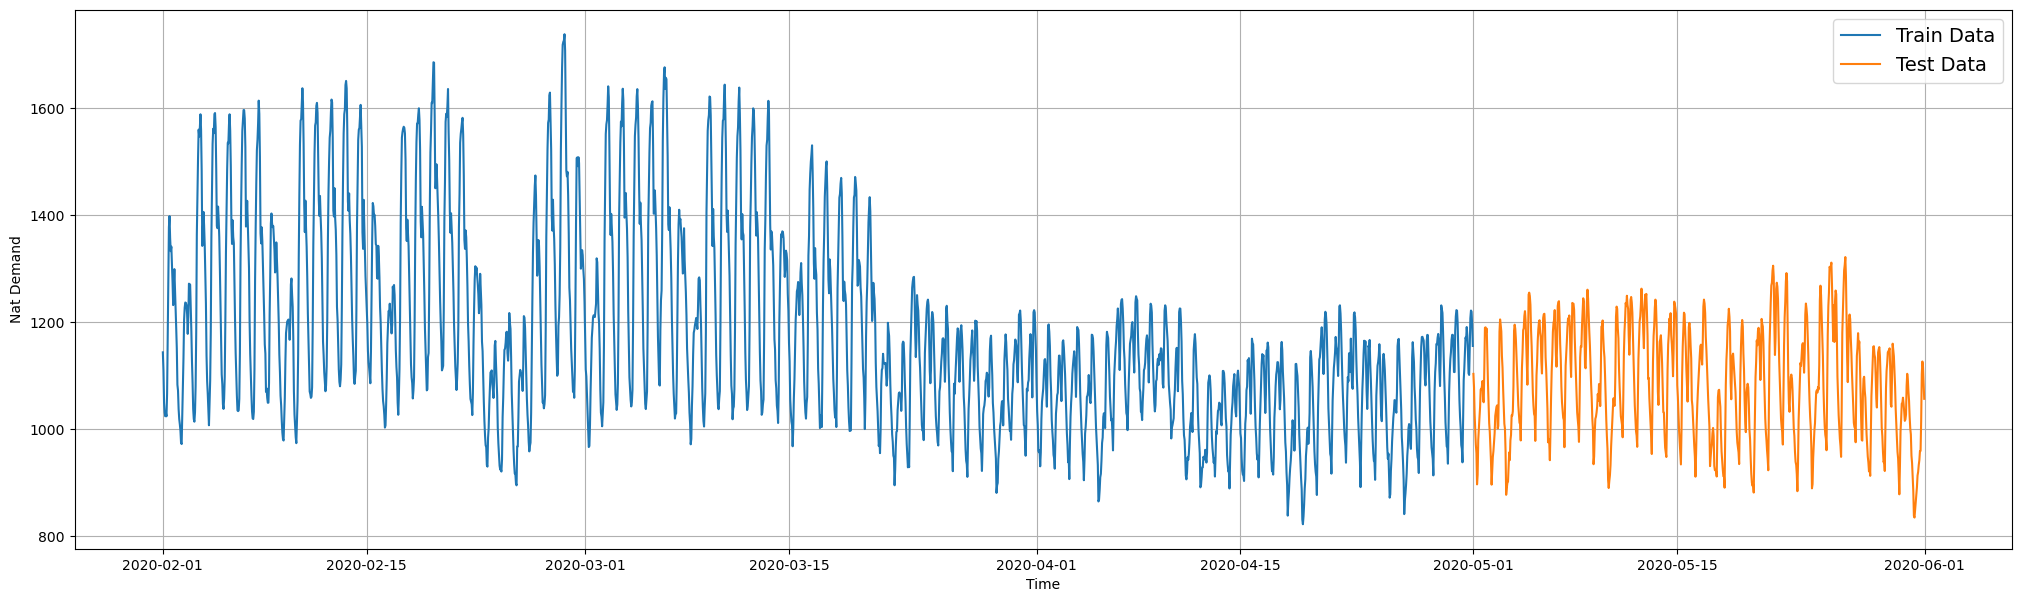

In [46]:
plt.figure(figsize=(25, 7))
plot_time_series(timesteps=timesteps_train, values=nat_demand_train, format='-', label="Train Data")
plot_time_series(timesteps=timesteps_test, values=nat_demand_test, format='-', label="Test Data")

In [47]:
trainbaru.columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

In [48]:
col=['Holiday_ID', 'holiday', 'school']
trainbaru = trainbaru.drop(columns=col)
testbaru = testbaru.drop(columns=col)

In [49]:
features = ['T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav', 'W2M_dav']
target = 'nat_demand'

**Lag Features**

In [50]:
for i in range(1, 8):
    trainbaru[f'{target}_lag_{i}'] = trainbaru[target].shift(i)
    testbaru[f'{target}_lag_{i}'] = testbaru[target].shift(i)

testbaru.dropna(inplace=True)
trainbaru.dropna(inplace=True)

In [51]:
trainbaru.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,nat_demand_lag_1,nat_demand_lag_2,nat_demand_lag_3,nat_demand_lag_4,nat_demand_lag_5,nat_demand_lag_6,nat_demand_lag_7
datetime,,,,,,,,,,,,,,,,,,,,
01-02-2020 07:00,1065.8115,26.030328,0.017907,0.011253,14.700505,24.467828,0.017091,0.020416,7.661281,21.358453,0.014596,0.043365,3.759140,1023.6490,1030.6722,1023.7209,1030.6316,1049.0349,1110.1528,1143.2227
01-02-2020 08:00,1171.4744,27.172632,0.017693,0.031044,17.893389,26.446069,0.017357,0.020378,10.090595,23.008569,0.014889,0.043320,3.785895,1065.8115,1023.6490,1030.6722,1023.7209,1030.6316,1049.0349,1110.1528
01-02-2020 09:00,1267.0011,28.275995,0.017670,0.047272,18.789214,28.143182,0.017532,0.019295,10.615407,24.986932,0.015224,0.048889,3.245576,1171.4744,1065.8115,1023.6490,1030.6722,1023.7209,1030.6316,1049.0349
01-02-2020 10:00,1377.4080,29.210382,0.017798,0.055786,18.354303,29.530695,0.017729,0.018059,9.734502,26.694757,0.015250,0.052841,2.577449,1267.0011,1171.4744,1065.8115,1023.6490,1030.6722,1023.7209,1030.6316
01-02-2020 11:00,1397.9304,29.921350,0.017942,0.075531,17.522618,30.671350,0.017904,0.026825,8.577973,27.788538,0.015371,0.055664,2.097422,1377.4080,1267.0011,1171.4744,1065.8115,1023.6490,1030.6722,1023.7209


In [52]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'train' and 'test' are your dataframes and 'nat_demand' is a column to exclude from scaling
columns_to_scale = [col for col in trainbaru.columns if col != 'nat_demand']

# Create a scaler and fit it only on the columns to be scaled
scaler = MinMaxScaler()
scaler.fit(trainbaru[columns_to_scale])

# Transform the selected columns in both the train and test sets
train_scaled = trainbaru.copy()
train_scaled[columns_to_scale] = scaler.transform(trainbaru[columns_to_scale])

test_scaled = testbaru.copy()
test_scaled[columns_to_scale] = scaler.transform(testbaru[columns_to_scale])

In [53]:
def prepare_data_with_window(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [54]:
# Define window size and forecast horizon
n_steps_in = 48  # Window size
n_steps_out = 1  # Forecast horizon

# Prepare data for LSTM
X_train, y_train = prepare_data_with_window(train_scaled.values, n_steps_in, n_steps_out)
X_test, y_test = prepare_data_with_window(test_scaled.values, n_steps_in, n_steps_out)

In [55]:
# Reshape input for SimpleRNN [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

**Proses Tuning Pre-Trained Model untuk Melakukan Transfer Learning terhadap Unseen Data**

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step - loss: 395329.0938 - val_loss: 22107.5605
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 20977.8828 - val_loss: 2779.3396
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 7471.5176 - val_loss: 1406.8145
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 5310.2773 - val_loss: 1417.8700
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 3798.0762 - val_loss: 1142.1698
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3743.1609 - val_loss: 1118.0106
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3646.9697 - val_loss: 1118.9913
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 3723.1519 - val_loss: 1140.2170
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 3690.6589 - val_loss: 1091.0844
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 3759.1880 - val_loss: 1088.6029
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 3797.3564 - val_loss: 1

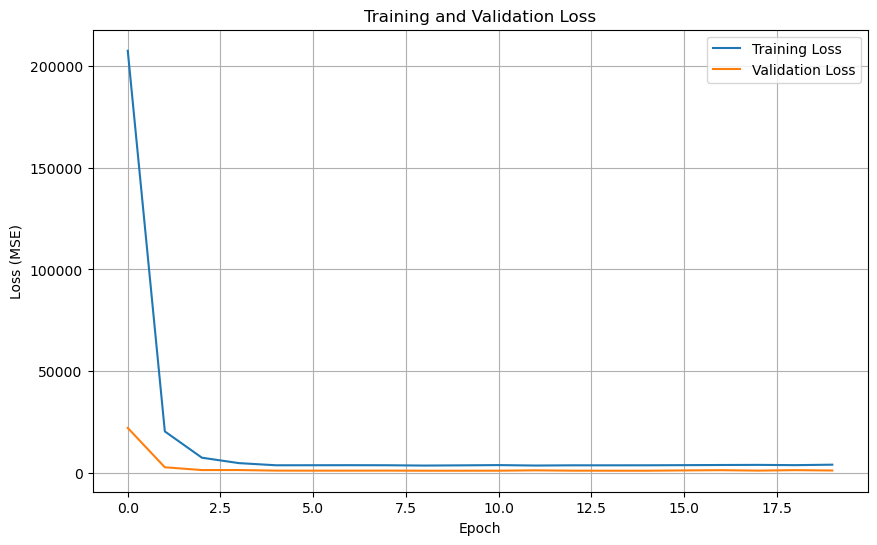

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 48, 64)         │         5,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,312 (446.54 KB)

 Trainable params: 33,538 (131.01 KB)

 Non-trainable params: 13,696 (53.50 KB)

 Optimizer params: 67,078 (262.03 KB)

In [56]:
for layer in modelbaru.layers[:2]:
  layer.trainable = False

modelbaru.add(Dense(units=128, activation='relu'))
modelbaru.add(Dense(units=64))
modelbaru.add(Dense(1))

modelbaru.compile(optimizer='adam', loss='mse')

historybaru = modelbaru.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test, y_test))

y_pred = modelbaru.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) for Horizon {n_steps_out}: {rmse}')

# Plot training history
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(historybaru.history['loss'], label='Training Loss')
    plt.plot(historybaru.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the training and validation loss
plot_loss(historybaru)

# Display model summary
modelbaru.summary()

Training fold 1
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 157ms/step - loss: 1103458.3750 - val_loss: 5112.5444
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 69164.0234 - val_loss: 66823.1797
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 25203.5254 - val_loss: 15325.4023
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 9319.8086 - val_loss: 3826.8645
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 5401.5884 - val_loss: 1689.0808
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 4118.9204 - val_loss: 1236.2296
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 3728.6321 - val_loss: 888.8105
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 3723.7197 - val_loss: 945.9243
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 3676.7981 - val_loss: 1502.7356
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4153.2441 - val_loss: 858.2828
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 3728.29

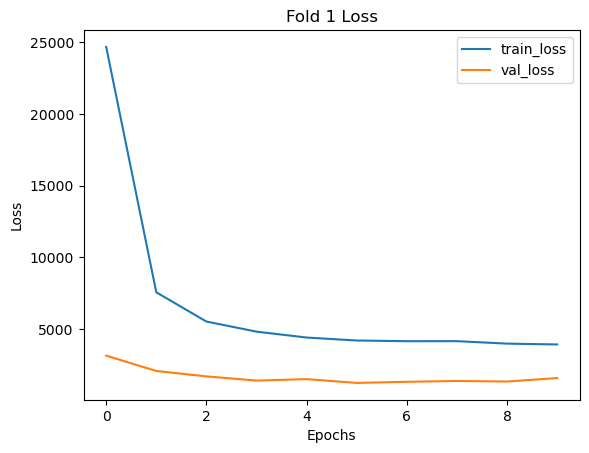

RMSE for fold 1: 31.804422668388924
Training fold 2
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - loss: 684683.6875 - val_loss: 131737.2188
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 57606.8125 - val_loss: 33724.2148
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 17751.3125 - val_loss: 6171.7505
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 7002.6719 - val_loss: 1129.0377
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 4975.4399 - val_loss: 2525.5259
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 4369.7905 - val_loss: 1152.6829
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3894.5027 - val_loss: 1078.6224
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 3763.1328 - val_loss: 1040.8109
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 3951.3428 - val_loss: 1041.5776
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 3471.4861 - val_loss: 1145.2166
Epoch 11/20
14/14 ━━━━━━━━━━

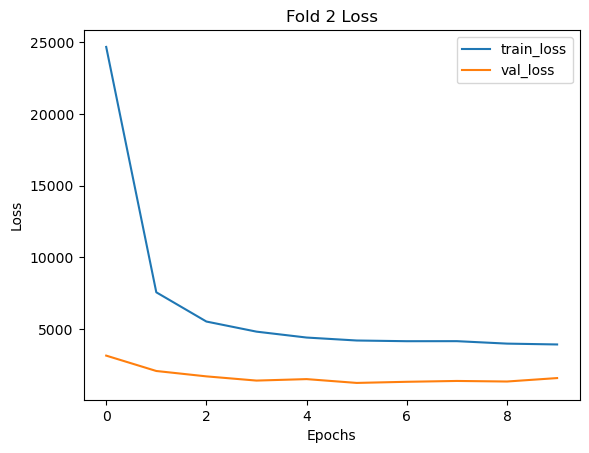

RMSE for fold 2: 35.34040656157622
Training fold 3
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 259ms/step - loss: 499418.1875 - val_loss: 88692.9141
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 40968.0469 - val_loss: 1330.5957
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 10340.6484 - val_loss: 5406.9888
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 5544.7544 - val_loss: 1937.6571
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 4222.2666 - val_loss: 1418.5720
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 3910.9756 - val_loss: 1044.1656
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3873.9097 - val_loss: 1101.2313
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 3634.2781 - val_loss: 987.3843
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3629.9475 - val_loss: 1320.0900
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4039.4956 - val_loss: 966.0745
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━

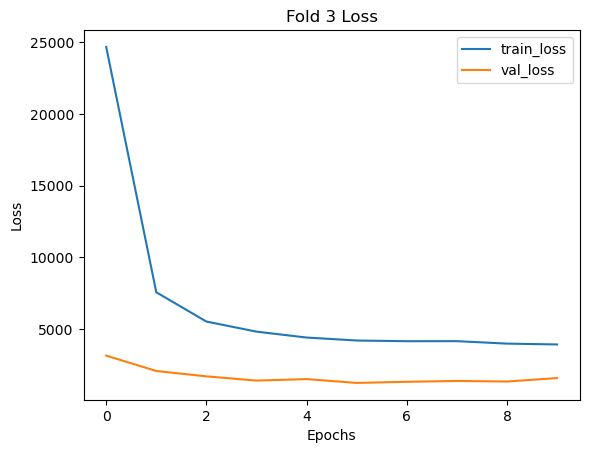

RMSE for fold 3: 34.64821994717496
Training fold 4
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - loss: 407890.0938 - val_loss: 66897.1094
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 102569.1953 - val_loss: 29569.6953
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 30320.1602 - val_loss: 12047.0332
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 11384.4658 - val_loss: 904.6651
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4775.6602 - val_loss: 2651.7761
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4714.6733 - val_loss: 899.9604
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 3997.0920 - val_loss: 867.9608
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 3800.7368 - val_loss: 953.0089
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 3715.7241 - val_loss: 928.1945
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3998.8269 - val_loss: 1278.3929
Epoch 11/20
14/14 ━━━━━━━━━━━━━━

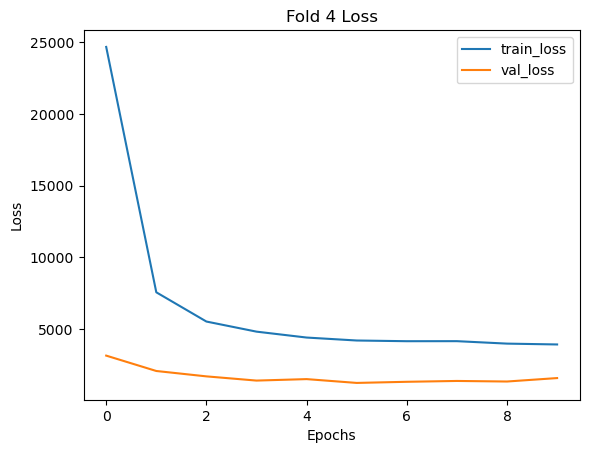

RMSE for fold 4: 29.45946653381611
Training fold 5
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - loss: 471529.7812 - val_loss: 15248.1104
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 43755.0273 - val_loss: 3752.4514
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 12258.8457 - val_loss: 868.8878
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 6075.8037 - val_loss: 1190.6403
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4454.4521 - val_loss: 916.4660
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 3984.0359 - val_loss: 1104.7065
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 4327.3115 - val_loss: 1539.7811
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4295.4087 - val_loss: 931.2372
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 4397.4229 - val_loss: 1317.3750
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 4244.5039 - val_loss: 1092.2244
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━

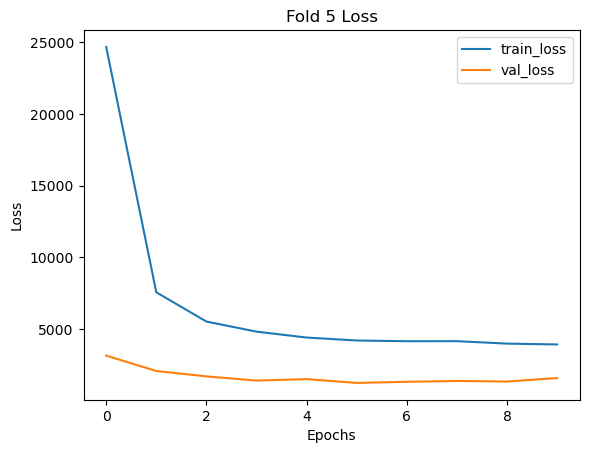

RMSE for fold 5: 30.52459625551991
Average RMSE across all folds: 32.35542239329523
RMSE values for tuned model: [31.804422668388924, 35.34040656157622, 34.64821994717496, 29.45946653381611, 30.52459625551991]


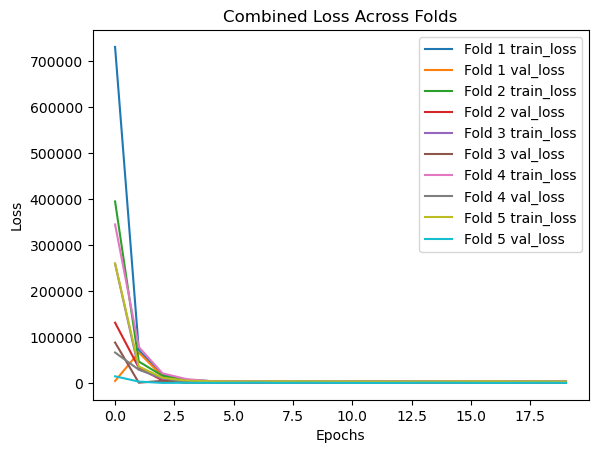

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, AdamW
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold

# Prepare the data for K-Fold Cross Validation
X, y = prepare_data_with_window(train_scaled.values, n_steps_in, n_steps_out)

# Reshape input for SimpleRNN [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=False)  # Time series data should not be shuffled

# Initialize variables to store cumulative results
cumulative_rmse = 0
fold_no = 1
rmse_tuned = []
fold_histories = []

for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    for layer in modelbaru.layers[:2]:
      layer.trainable = False

    modelbaru.add(Dense(units=128, activation='relu'))
    modelbaru.add(Dense(units=64))
    modelbaru.add(Dense(units=32))
    modelbaru.add(Dense(1))

    modelbaru.compile(optimizer='adam', loss='mse')

    # Train the model
    print(f'Training fold {fold_no}')
    historybaru = modelbaru.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_val, y_val))

    fold_histories.append(historybaru)

    # Plot the training history
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'Fold {fold_no} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate the model on the validation set
    val_loss = modelbaru.evaluate(X_val, y_val, verbose=0)
    rmse = np.sqrt(val_loss)
    rmse_tuned.append(rmse)
    print(f'RMSE for fold {fold_no}: {rmse}')

    # Add RMSE to the cumulative RMSE
    cumulative_rmse += rmse

    fold_no += 1

# Calculate average RMSE across all folds
average_rmse = cumulative_rmse / kf.get_n_splits()
print(f'Average RMSE across all folds: {average_rmse}')
print(f'RMSE values for tuned model: {rmse_tuned}')

# Plot combined loss across all folds
plt.figure()
for fold, history in enumerate(fold_histories, 1):
    plt.plot(history.history['loss'], label=f'Fold {fold} train_loss')
    plt.plot(history.history['val_loss'], label=f'Fold {fold} val_loss')

plt.title('Combined Loss Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Setelah dilakukan cross validation dengan metode K-Fold sebanyak 5, rata-rata RMSE adalah 32.35 yang mana lebih baik daripada model pre-trained

In [58]:
len(y_pred), len(y_test)

(689, 689)

**Evaluate**

In [59]:
modelbaru.evaluate(X_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1084.8335


1111.1390380859375

In [60]:
import tensorflow as tf
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [61]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.MeanAbsoluteError()(y_true, y_pred)
    mse = tf.keras.metrics.MeanSquaredError()(y_true, y_pred) # puts an emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

results = evaluate_preds(y_true=y_test.flatten(), y_pred=y_pred.flatten())
print(results)

{'mae': 27.16991, 'mse': 1192.5647, 'rmse': 34.53353, 'mape': 2.4936097, 'mase': 0.8436281}


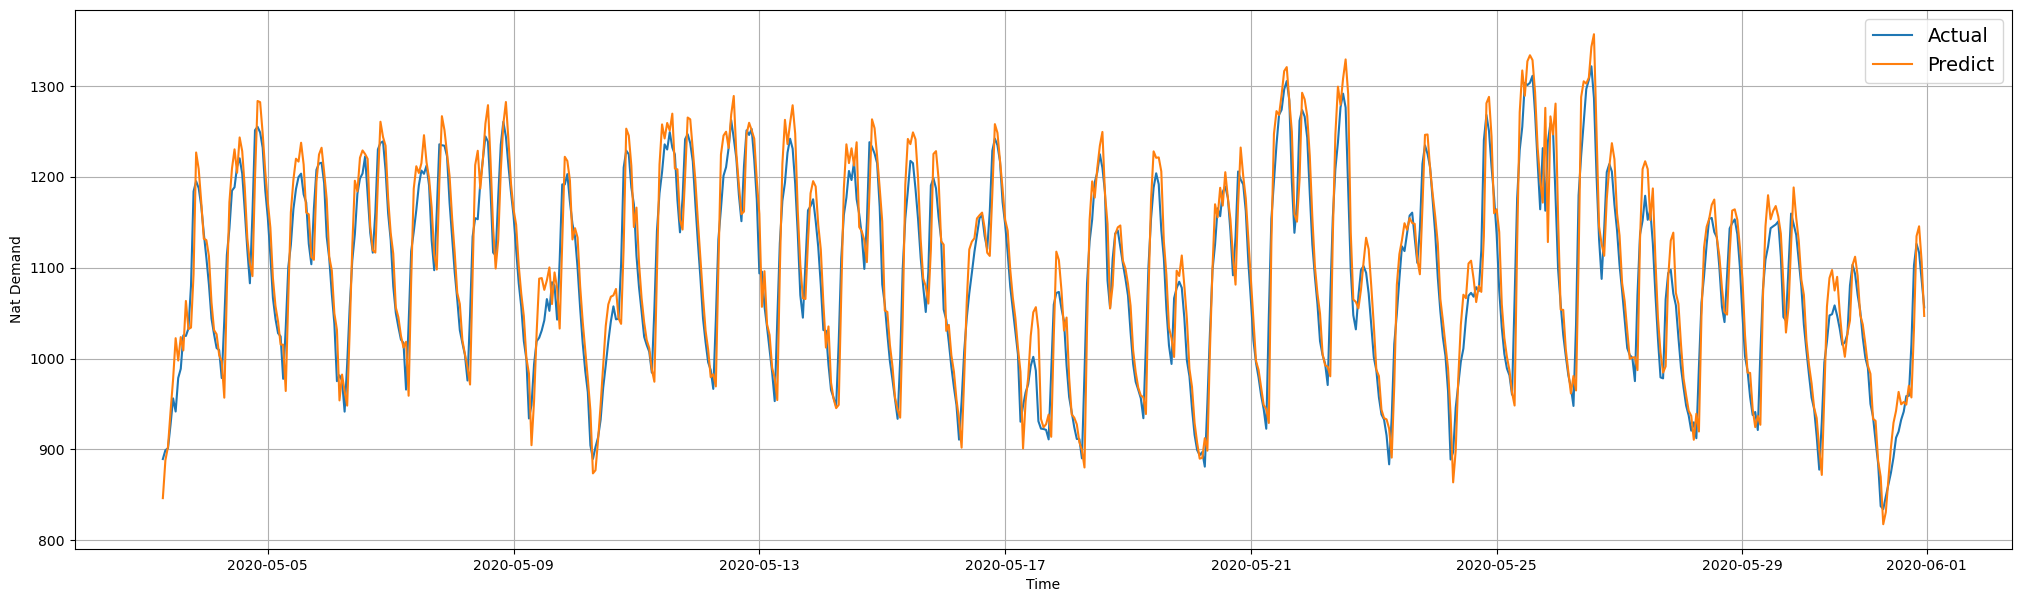

In [62]:
plt.figure(figsize=(25, 7))
plot_time_series(timesteps=timesteps_test[-len(X_test):], values=y_test.flatten(), format='-', label="Actual")
plot_time_series(timesteps=timesteps_test[-len(X_test):], values=y_pred.flatten(), format='-', label="Predict")

**Mengekspor model tuned untuk dimasukkan unseen data**

In [63]:
modelbaru.save('modeltransfer.keras')

df_juni adalah unseen data yang akan kita prediksi 'nat_demand'-nya

In [64]:
# Load the new dataset
df_juni = pd.read_csv("https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/datasetJuni2020.csv",
                         parse_dates=["datetime"],
                         index_col=["datetime"])

In [65]:
df_juni

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
01-06-2020 00:00,999.6582,25.555933,0.018617,0.099304,6.109912,24.087183,0.017838,0.075409,4.330679,22.680933,0.017167,0.153076,3.782930,0,0,0
01-06-2020 01:00,996.2859,25.458826,0.018502,0.090363,5.619336,23.911951,0.017686,0.084381,4.114512,22.505701,0.017083,0.157043,4.053217,0,0,0
01-06-2020 02:00,972.3116,25.374414,0.018388,0.078186,5.512383,23.811914,0.017602,0.082275,3.942502,22.421289,0.017037,0.160889,4.082030,0,0,0
01-06-2020 03:00,950.9820,25.296655,0.018304,0.070221,5.659582,23.687280,0.017465,0.064178,3.855281,22.421655,0.017014,0.167969,4.046894,0,0,0
01-06-2020 04:00,934.7633,25.281488,0.018243,0.063965,5.387814,23.562738,0.017297,0.056396,3.649147,22.468988,0.016999,0.176636,4.000381,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26-06-2020 20:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
26-06-2020 21:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
26-06-2020 22:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


In [66]:
# Drop unnecessary columns
col = ['Holiday_ID', 'holiday', 'school']
df_juni = df_juni.drop(columns=col)

In [67]:
# Add necessary columns for lagged 'nat_demand' features with initial zeros
for i in range(1, 8):
    df_juni[f'nat_demand_lag_{i}'] = 0.0

In [68]:
df_juni

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,nat_demand_lag_1,nat_demand_lag_2,nat_demand_lag_3,nat_demand_lag_4,nat_demand_lag_5,nat_demand_lag_6,nat_demand_lag_7
datetime,,,,,,,,,,,,,,,,,,,,
01-06-2020 00:00,999.6582,25.555933,0.018617,0.099304,6.109912,24.087183,0.017838,0.075409,4.330679,22.680933,0.017167,0.153076,3.782930,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-06-2020 01:00,996.2859,25.458826,0.018502,0.090363,5.619336,23.911951,0.017686,0.084381,4.114512,22.505701,0.017083,0.157043,4.053217,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-06-2020 02:00,972.3116,25.374414,0.018388,0.078186,5.512383,23.811914,0.017602,0.082275,3.942502,22.421289,0.017037,0.160889,4.082030,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-06-2020 03:00,950.9820,25.296655,0.018304,0.070221,5.659582,23.687280,0.017465,0.064178,3.855281,22.421655,0.017014,0.167969,4.046894,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-06-2020 04:00,934.7633,25.281488,0.018243,0.063965,5.387814,23.562738,0.017297,0.056396,3.649147,22.468988,0.016999,0.176636,4.000381,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26-06-2020 20:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26-06-2020 21:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26-06-2020 22:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Kita perlu menggunakan 48 data terakhir dari bulan Mei untuk dapat memprediksi dari awal sampai akhir Juni 2020. Jika tidak, dataframe Juni akan terpotong sebanyak 48 hari karena tadi jumlah window-nya adalah 48

In [69]:
df_juni.columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'nat_demand_lag_1', 'nat_demand_lag_2', 'nat_demand_lag_3',
       'nat_demand_lag_4', 'nat_demand_lag_5', 'nat_demand_lag_6',
       'nat_demand_lag_7'],
      dtype='object')

In [70]:
# Load the May dataset
df_mei = pd.read_csv("https://raw.githubusercontent.com/grandiv/ElectricityLoadForecasting/main/datasetMei2020.csv",
                     parse_dates=["datetime"],
                     index_col=["datetime"])

In [71]:
df_mei

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
01-05-2020 00:00,1102.9328,26.874017,0.018437,0.036209,17.919882,25.061517,0.017797,0.055649,4.158032,23.311517,0.017140,0.055389,1.802112,12,1,1
01-05-2020 01:00,1078.1345,26.768365,0.018583,0.050919,16.628721,24.799615,0.017766,0.064728,3.771603,23.143365,0.016942,0.053055,1.860856,12,1,1
01-05-2020 02:00,1028.1121,26.687830,0.018697,0.062714,15.906288,24.640955,0.017767,0.070129,3.455991,23.023767,0.016790,0.061813,1.870863,12,1,1
01-05-2020 03:00,1000.8457,26.642664,0.018735,0.058975,15.762716,24.572351,0.017812,0.067871,3.261924,22.955164,0.016652,0.076141,1.863408,12,1,1
01-05-2020 04:00,970.6304,26.604272,0.018796,0.043167,15.394947,24.518335,0.017873,0.068268,3.118907,22.885522,0.016538,0.093811,1.742467,12,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-05-2020 19:00,1102.3474,26.267175,0.019204,0.237549,9.138213,25.032800,0.018701,0.192139,4.061258,23.251550,0.017770,0.364380,2.477404,0,0,0
31-05-2020 20:00,1126.0997,26.062341,0.019158,0.218994,8.163614,24.781091,0.018479,0.142639,4.209720,23.171716,0.017610,0.317871,2.231447,0,0,0
31-05-2020 21:00,1116.4743,25.920251,0.019036,0.181702,7.631517,24.560876,0.018273,0.105164,4.309013,23.092126,0.017472,0.252441,2.508903,0,0,0


In [72]:
df_mei = df_mei.drop(columns=col)

In [73]:
# Extract the last 48 hours from May
n_steps_in = 48
df_mei_last_48 = df_mei.iloc[-n_steps_in:]

In [74]:
for i in range(1, 8):
  df_mei_last_48.loc[:, f'nat_demand_lag_{i}'] = 0.0

C:\Users\hp\AppData\Local\Temp\ipykernel_8532\1766172907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mei_last_48.loc[:, f'nat_demand_lag_{i}'] = 0.0
C:\Users\hp\AppData\Local\Temp\ipykernel_8532\1766172907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mei_last_48.loc[:, f'nat_demand_lag_{i}'] = 0.0
C:\Users\hp\AppData\Local\Temp\ipykernel_8532\1766172907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [75]:
df_mei_last_48

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,nat_demand_lag_1,nat_demand_lag_2,nat_demand_lag_3,nat_demand_lag_4,nat_demand_lag_5,nat_demand_lag_6,nat_demand_lag_7
datetime,,,,,,,,,,,,,,,,,,,,
30-05-2020 00:00,1036.9810,26.319238,0.019464,0.126404,7.823060,25.553613,0.019540,0.157837,4.357076,22.522363,0.017083,0.086243,2.756125,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30-05-2020 01:00,1008.5706,26.248407,0.019349,0.128662,7.578731,25.389032,0.019616,0.080139,4.881527,22.342157,0.016908,0.085663,3.855113,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30-05-2020 02:00,981.9116,26.184045,0.019227,0.131958,7.459106,25.152795,0.019547,0.048904,5.616554,22.152795,0.016702,0.093475,4.664174,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30-05-2020 03:00,956.9958,26.151575,0.019105,0.131775,7.368030,25.104700,0.019494,0.045883,6.521349,21.995325,0.016519,0.092346,4.869373,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30-05-2020 04:00,944.4835,26.076563,0.018998,0.132263,7.345016,25.092188,0.019471,0.042633,7.171119,21.842188,0.016374,0.095428,4.584665,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30-05-2020 05:00,914.5798,25.959528,0.018914,0.139648,7.421373,25.162653,0.019494,0.038391,8.821850,21.693903,0.016267,0.122253,4.222368,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30-05-2020 06:00,877.7646,26.201593,0.019052,0.149841,8.452891,25.373468,0.019624,0.058380,12.431838,21.654718,0.016267,0.189636,3.788038,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30-05-2020 07:00,930.1995,27.000665,0.018907,0.168945,12.205628,25.641290,0.019769,0.084534,13.895861,22.110040,0.016603,0.224609,3.409267,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30-05-2020 08:00,995.7161,27.471948,0.018930,0.194153,14.018857,25.956323,0.019983,0.155640,13.475124,22.768823,0.016946,0.237488,3.481769,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df_mei_last_48.columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'nat_demand_lag_1', 'nat_demand_lag_2', 'nat_demand_lag_3',
       'nat_demand_lag_4', 'nat_demand_lag_5', 'nat_demand_lag_6',
       'nat_demand_lag_7'],
      dtype='object')

**Menggabungkan dataset Mei dan Juni**

karena data yang kita gunakan adalah time-series maka kita perlu meng-include data sebelumnya. Artinya, jika kita ingin memprediksi bulan Juni dari tanggal 1 sampai akhir bulan maka kita perlu memasukkan data dari bulan Mei atau 48 hari sebelum 1 Juni. Hal ini karena window yang digunakan tadi adalah 48

In [77]:
df_combined = pd.concat([df_mei_last_48, df_juni])

In [78]:
# Define columns to scale
columns_to_scale = [col for col in df_combined.columns if col != 'nat_demand']
scaler = MinMaxScaler()
scaler.fit(df_combined[columns_to_scale])

MinMaxScaler()

In [79]:
# Scale the features in the new dataset
df_combined_scaled = df_combined.copy()
df_combined_scaled[columns_to_scale] = scaler.transform(df_combined[columns_to_scale])

In [80]:
# Prepare data with window size for SimpleRNN model
def prepare_data_with_window(data, n_steps_in):
    X = []
    for i in range(len(data) - n_steps_in):
        end_ix = i + n_steps_in
        seq_x = data[i:end_ix, :]
        X.append(seq_x)
    return np.array(X)

# Prepare the data
X_transfer = prepare_data_with_window(df_combined_scaled.values, n_steps_in)

# Reshape input for SimpleRNN [samples, timesteps, features]
X_transfer = X_transfer.reshape((X_transfer.shape[0], n_steps_in, X_transfer.shape[2]))

In [81]:
# Load the trained model
modeltransfer = load_model('modeltransfer.keras')
modelnotransfer = load_model('modelsutet.keras')

'modeltransfer.keras' adalah model pre-trained yang sudah di-tuning dan siap digunakan untuk prediksi

In [82]:
# Make predictions
predictionstransfer = modeltransfer.predict(X_transfer)
predictionsnotransfer = modelnotransfer.predict(X_transfer)

# The combined DataFrame should have `n_steps_in` fewer rows than the combined dataset
df_combined = df_combined.iloc[n_steps_in:]

# Ensure the number of predictions matches the number of rows in the sliced DataFrame
df_combined = df_combined.iloc[:len(predictionstransfer)]

# Add predictions to the DataFrame
df_combined['nat_demand_predicted_transfer'] = predictionstransfer
df_combined['nat_demand_predicted_no_transfer'] = predictionsnotransfer

# Save only the June predictions, preserving the original datetime index
df_juni = df_combined[df_combined.index >= df_juni.index[0]]

# Save the updated dataset
df_juni.to_csv('datasetJuni2020_predicted.csv')

print("Prediction complete. The updated dataset has been saved to 'datasetJuni2020_predicted.csv'.")

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step
Prediction complete. The updated dataset has been saved to 'datasetJuni2020_predicted.csv'.


In [83]:
df_juni = pd.read_csv('datasetJuni2020_predicted.csv', parse_dates=["datetime"], index_col=["datetime"])
df_juni

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,...,W2M_dav,nat_demand_lag_1,nat_demand_lag_2,nat_demand_lag_3,nat_demand_lag_4,nat_demand_lag_5,nat_demand_lag_6,nat_demand_lag_7,nat_demand_predicted_transfer,nat_demand_predicted_no_transfer
datetime,,,,,,,,,,,,,,,,,,,,,
01-06-2020 00:00,999.6582,25.555933,0.018617,0.099304,6.109912,24.087183,0.017838,0.075409,4.330679,22.680933,...,3.782930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1042.17460,1011.45480
01-06-2020 01:00,996.2859,25.458826,0.018502,0.090363,5.619336,23.911951,0.017686,0.084381,4.114512,22.505701,...,4.053217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,988.61053,952.72186
01-06-2020 02:00,972.3116,25.374414,0.018388,0.078186,5.512383,23.811914,0.017602,0.082275,3.942502,22.421289,...,4.082030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,992.41144,962.22950
01-06-2020 03:00,950.9820,25.296655,0.018304,0.070221,5.659582,23.687280,0.017465,0.064178,3.855281,22.421655,...,4.046894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,953.00793,920.78070
01-06-2020 04:00,934.7633,25.281488,0.018243,0.063965,5.387814,23.562738,0.017297,0.056396,3.649147,22.468988,...,4.000381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,941.13720,916.56280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26-06-2020 20:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,...,2.444658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135.64610,1112.92900
26-06-2020 21:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,...,2.515814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1129.42900,1112.13330
26-06-2020 22:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,...,2.800717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1114.45430,1096.47680


**Kolom 'nat_demand' masih digunakan untuk membandingkan hasil predicted dengan actual**

Before Transfer Mean Absolute Error (MAE): 29.661780527999998
Before Transfer Root Mean Squared Error (RMSE): 39.78702659600265
Before Transfer Mean Absolute Percentage Error (MAPE): 2.716295734919557%
Before Transfer Accuracy: 97.28370426508044% 

After Transfer Mean Absolute Error (MAE): 25.945892288
After Transfer Root Mean Squared Error (RMSE): 33.685668554796166
After Transfer Mean Absolute Percentage Error (MAPE): 2.343098228675914%
After Transfer Accuracy: 97.65690177132409%


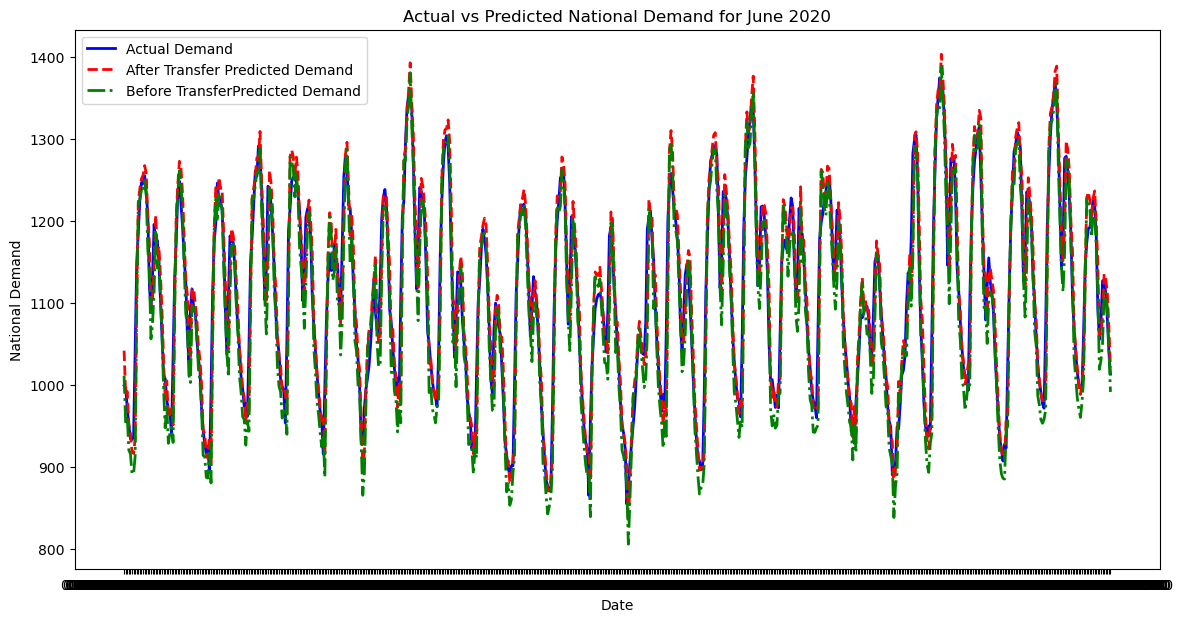

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics
mae = mean_absolute_error(df_juni['nat_demand'], df_juni['nat_demand_predicted_transfer'])
rmse = np.sqrt(mean_squared_error(df_juni['nat_demand'], df_juni['nat_demand_predicted_transfer']))
mape = np.mean(np.abs((df_juni['nat_demand'] - df_juni['nat_demand_predicted_transfer']) / df_juni['nat_demand'])) * 100
premae = mean_absolute_error(df_juni['nat_demand'], df_juni['nat_demand_predicted_no_transfer'])
prermse = np.sqrt(mean_squared_error(df_juni['nat_demand'], df_juni['nat_demand_predicted_no_transfer']))
premape = np.mean(np.abs((df_juni['nat_demand'] - df_juni['nat_demand_predicted_no_transfer']) / df_juni['nat_demand'])) * 100

# Calculate the accuracy
accuracy = 100 - mape
preaccuracy = 100 - premape

print(f'Before Transfer Mean Absolute Error (MAE): {premae}')
print(f'Before Transfer Root Mean Squared Error (RMSE): {prermse}')
print(f"Before Transfer Mean Absolute Percentage Error (MAPE): {premape}%")
print(f"Before Transfer Accuracy: {preaccuracy}% \n")
print(f'After Transfer Mean Absolute Error (MAE): {mae}')
print(f'After Transfer Root Mean Squared Error (RMSE): {rmse}')
print(f"After Transfer Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"After Transfer Accuracy: {accuracy}%")

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))

# Plot the actual values
plt.plot(df_juni.index, df_juni['nat_demand'], label='Actual Demand', color='blue', linewidth=2)

# Plot the predicted values
plt.plot(df_juni.index, df_juni['nat_demand_predicted_transfer'], label='After Transfer Predicted Demand', color='red', linestyle='--', linewidth=2)
plt.plot(df_juni.index, df_juni['nat_demand_predicted_no_transfer'], label='Before TransferPredicted Demand', color='green', linestyle='-.', linewidth=2)

# Add title and labels
plt.title('Actual vs Predicted National Demand for June 2020')
plt.xlabel('Date')
plt.ylabel('National Demand')
plt.legend()

# Display the plot
plt.show()

Berdasarkan grafik di atas, terlihat bahwa hasil prediksi cukup akurat dibanding nilai actual dari 'nat_demand' dengan akurasi berada di kiisaran **97%**, terlihat juga hasil akurasi setelah model di transfer (97.65%) lebih baik daripada model sebelum di transfer (97.28%), sehingga mennandakan proses transfer learning berhasil.

**T-test**

In [85]:
from scipy import stats

preerror = np.abs(df_juni['nat_demand_predicted_no_transfer'] - df_juni['nat_demand'])
transfererror = np.abs(df_juni['nat_demand_predicted_transfer'] - df_juni['nat_demand'])

t_stat, p_value = stats.ttest_rel(preerror, transfererror)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
  print("There is a significant difference between the pre-trained and tuned models' performances.")
else:
  print("There is no significant difference between the pre-trained and tuned models' performances.")

T-statistic: 4.282927179839143
P-value: 2.135379861847659e-05
There is a significant difference between the pre-trained and tuned models' performances.


P-value adalah pengukuran statistika untuk memvalidasi hipotesis terhadap data yang diamati. P-value mengukur kemungkinan hipotesis sesuai dengan pengujian yang diamati

P-value lebih kecil daripada alpha (0.05), artinya bahwa ada cukup bukti statistik untuk gagal menolak hipotesis 0 atau H0.

Oleh karena itu, ada cukup bukti statistik yang menunjukkan adanya perbedaan yang signifikan antara performa model yang telah dilatih sebelumnya dan model yang telah di-tuning.